In [11]:
import numpy as np
from numpy import pi
from math import dist

In [273]:
def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

# C1

In [263]:
def distance_C1(x, y, a, b):
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            for option_c in options:
                Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2] + 2*pi * option_c])
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [264]:
def generate_c1_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(2*pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [265]:
isoms = generate_c1_isoms(1000, 6, 6)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],6,6)

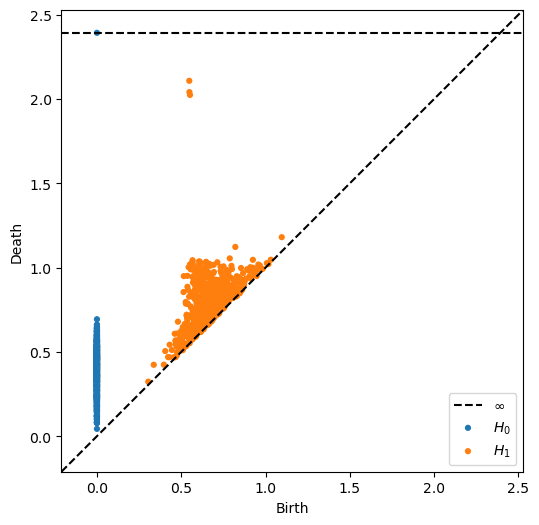

In [266]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [267]:
persistent_H1_intervals(output)

[1.5601078271865845,
 1.4924030303955078,
 1.4720627069473267,
 0.4766578674316406,
 0.46797239780426025,
 0.4659692645072937,
 0.46458178758621216,
 0.4630412459373474,
 0.45967262983322144,
 0.4587751030921936,
 0.44896435737609863,
 0.44478505849838257,
 0.44281476736068726,
 0.44185328483581543,
 0.43419235944747925,
 0.43333899974823,
 0.4313300848007202,
 0.4302629828453064,
 0.42586392164230347,
 0.4236220717430115,
 0.4191405773162842,
 0.413943350315094,
 0.41372936964035034,
 0.4095337986946106,
 0.4080926179885864,
 0.4012444019317627,
 0.39954376220703125,
 0.3889661431312561,
 0.388003945350647,
 0.38721132278442383,
 0.37880510091781616,
 0.3784623146057129,
 0.37807929515838623,
 0.3777541518211365,
 0.37320148944854736,
 0.37304288148880005,
 0.3729655146598816,
 0.3674532175064087,
 0.3614075779914856,
 0.36072415113449097,
 0.3578433394432068,
 0.35774409770965576,
 0.3570408821105957,
 0.35491931438446045,
 0.35004353523254395,
 0.3498060703277588,
 0.349178791046142

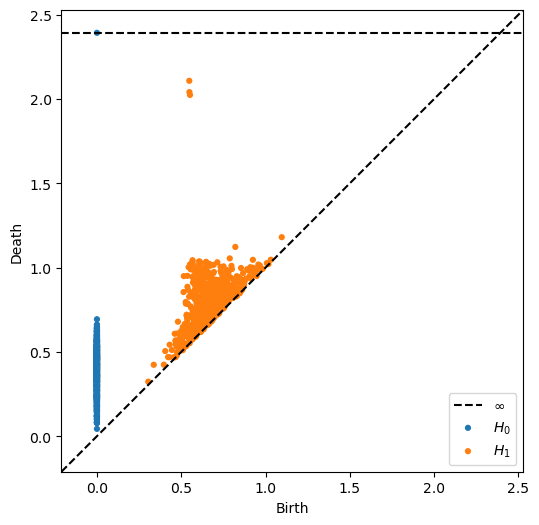

In [268]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [269]:
persistent_H1_intervals(output)

[1.5601078271865845,
 1.4924030303955078,
 1.4720627069473267,
 0.4766578674316406,
 0.46797239780426025,
 0.4659692645072937,
 0.46458178758621216,
 0.4630412459373474,
 0.45967262983322144,
 0.4587751030921936,
 0.44896435737609863,
 0.44478505849838257,
 0.44281476736068726,
 0.44185328483581543,
 0.43419235944747925,
 0.43333899974823,
 0.4313300848007202,
 0.4302629828453064,
 0.42586392164230347,
 0.4236220717430115,
 0.4191405773162842,
 0.413943350315094,
 0.41372936964035034,
 0.4095337986946106,
 0.4080926179885864,
 0.4012444019317627,
 0.39954376220703125,
 0.3889661431312561,
 0.388003945350647,
 0.38721132278442383,
 0.37880510091781616,
 0.3784623146057129,
 0.37807929515838623,
 0.3777541518211365,
 0.37320148944854736,
 0.37304288148880005,
 0.3729655146598816,
 0.3674532175064087,
 0.3614075779914856,
 0.36072415113449097,
 0.3578433394432068,
 0.35774409770965576,
 0.3570408821105957,
 0.35491931438446045,
 0.35004353523254395,
 0.3498060703277588,
 0.349178791046142

# C2

In [271]:
def distance_C1(x, y, a, b):
    
    # no translation in rotation axis
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([y[0] + a * option_a, y[1] + b * option_b, y[2]])
                      
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] + pi])
                      
    Y = []
    options = [-1,0,1]
    for option_a in options:
        for option_b in options:
            Y.append([a - y[0] + a * option_a, b - y[1] + b * option_b, y[2] - pi])
            
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [272]:
def generate_c2_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [276]:
isoms = generate_c2_isoms(1000, 3, 3)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],3,3)

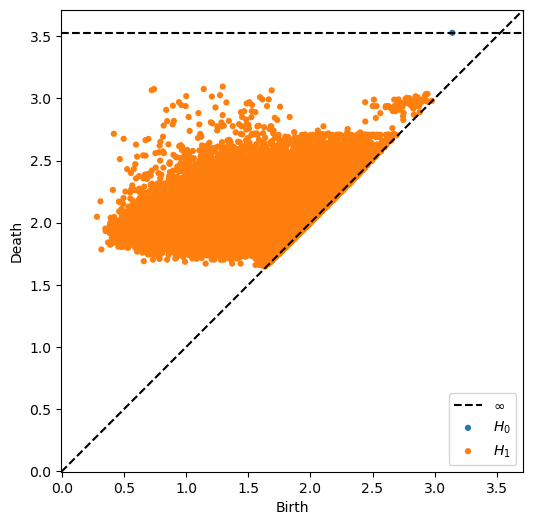

In [277]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [ ]:
persistent_H1_intervals(output)

In [ ]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [ ]:
persistent_H1_intervals(output)

In [25]:
def euc(x,y):
    return dist(x,y)

In [72]:
def top_bottomy(x,y,a,b):
    new_y = (a-y[0], b-y[1], y[2]+pi)
    return dist(x,new_y)

In [73]:
def top_bottomx(x,y,a,b):
    new_x = (a-x[0], b-x[1], x[2]+pi)
    return dist(new_x,y)

In [138]:
def right_lefty(x,y,a,b):
    new_y = (y[0]+a,y[1],y[2])
    return dist(x,new_y)

In [139]:
def right_leftx(x,y,a,b):
    new_x = (x[0]+a,x[1],x[2])
    return dist(new_x,y)

In [140]:
def front_backy(x,y,a,b):
    new_y = (y[0], y[1]+b, y[2])
    return dist(x,new_y)

In [141]:
def front_backx(x,y,a,b):
    new_x = (x[0], x[1]+b, x[2])
    return dist(new_x,y)

In [ ]:
def distance_C2(x, y, a, b): # x = (x1,x2,x3), y = (y1,y2,y3)
    return min([euc(x,y), top_bottomx(x,y,a,b), right_leftx(x,y,a,b), front_backx(x,y,a,b), top_bottomy(x,y,a,b), right_lefty(x,y,a,b), front_backy(x,y,a,b)])

In [142]:
distance_C2((.5,.5,.5), (1.5,.75,3*pi/4), 2, 1)

1.3094840352083459

In [143]:
euc((.5,.5,.5), (1.5,.75,3*pi/4))

2.12319523017089

In [144]:
top_bottomx((.5,.5,.5), (1.5,.75,3*pi/4),2,1)

1.3094840352083459

In [145]:
right_leftx((.5,.5,.5), (1.5,.75,3*pi/4),2,1)

2.12319523017089

In [146]:
front_backx((.5,.5,.5), (1.5,.75,3*pi/4),2,1)

2.2378467296534006

In [147]:
top_bottomy((.5,.5,.5), (1.5,.75,3*pi/4),2,1)

5.004036004522152

In [148]:
right_lefty((.5,.5,.5), (1.5,.75,3*pi/4),2,1)

3.5366591559578398

In [149]:
front_backy((.5,.5,.5), (1.5,.75,3*pi/4),2,1)

2.451113621483186

In [124]:
def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_c2_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms


In [125]:
isoms = generate_c2_isoms(1000, 2, 1)

In [126]:
isoms

[(1.729092376514234, 0.6461915446173562, 3.036684062615316),
 (1.1936863683178203, 0.5128082212039374, 0.5605272063620079),
 (1.2911634866512929, 0.9716175213734956, 2.320896943190994),
 (0.767595848140946, 0.20200584639155394, 1.4389852855193248),
 (0.7762064010197784, 0.9509455533860941, 1.3153228021959391),
 (0.6007732614915728, 0.9267211419151264, 2.8524183718143004),
 (0.6442942815927248, 0.3582396136604521, 2.9411347229436613),
 (0.3309003381892961, 0.4924689095438314, 0.04770892854301721),
 (1.0726185147913598, 0.767256587571615, 0.9641896853470728),
 (0.6718575571861771, 0.2406400184405284, 0.9476021607375108),
 (1.406334556123242, 0.596993627484666, 2.435555691753636),
 (1.7947645357070883, 0.5051832879946377, 1.8776975537200313),
 (1.8862851525439048, 0.9161488445095632, 1.2432571929781364),
 (0.5593788983605825, 0.6985082795818164, 2.9590002253608088),
 (0.1895863289747668, 0.9098016303036457, 1.6688653046455872),
 (1.9246550395580888, 0.5537812057858, 2.8929317838488826),
 

In [127]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],2,1)


In [128]:
import matplotlib.pyplot as plt

def get_matrix_pixels(num_pixels, window_size):
    sample = list(np.linspace(0, window_size, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels

def view_dist_matrix(matrix, num_pixels, window_size, title):
    
    pixels = get_matrix_pixels(num_pixels, window_size)
    
    x_points = []
    y_points = []
    for i in range(len(pixels)):
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    plt.title(title)
    plt.xlabel('indexed images')
    plt.ylabel('indexed images') 
    scatter = ax.scatter(x_points, y_points, c = np.concatenate(matrix),cmap='viridis')
    #plt.legend(*scatter.legend_elements())
    plt.show()

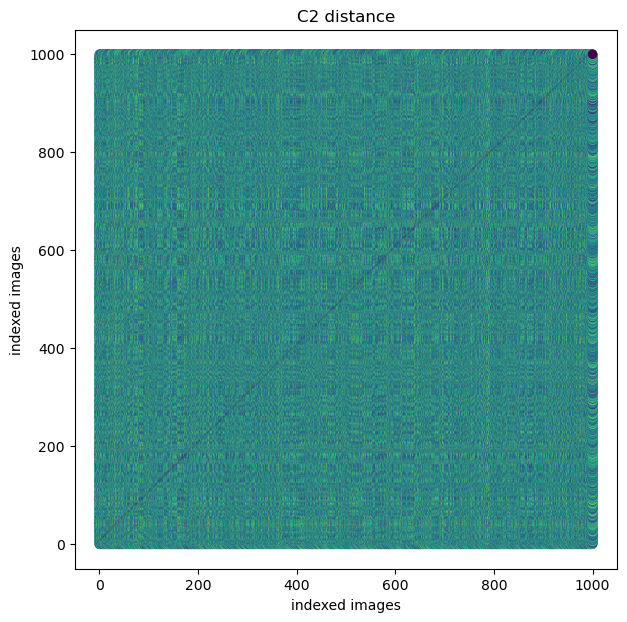

In [129]:
view_dist_matrix(matrix=M, num_pixels=1000, window_size=1000, title = 'C2 distance')

In [130]:
M

array([[0.        , 1.1487412 , 0.90001943, ..., 0.92319212, 0.95159425,
        1.60913445],
       [1.1487412 , 0.        , 1.54192232, ..., 0.8038816 , 0.35071928,
        1.25913989],
       [0.90001943, 1.54192232, 0.        , ..., 1.09592527, 1.22331073,
        0.74748369],
       ...,
       [0.92319212, 0.8038816 , 1.09592527, ..., 0.        , 0.79287752,
        1.41618767],
       [0.95159425, 0.35071928, 1.22331073, ..., 0.79287752, 0.        ,
        1.47727378],
       [1.60913445, 1.25913989, 0.74748369, ..., 1.41618767, 1.47727378,
        0.        ]])

In [131]:
from ripser import ripser
from persim import plot_diagrams

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
        
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

In [132]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)

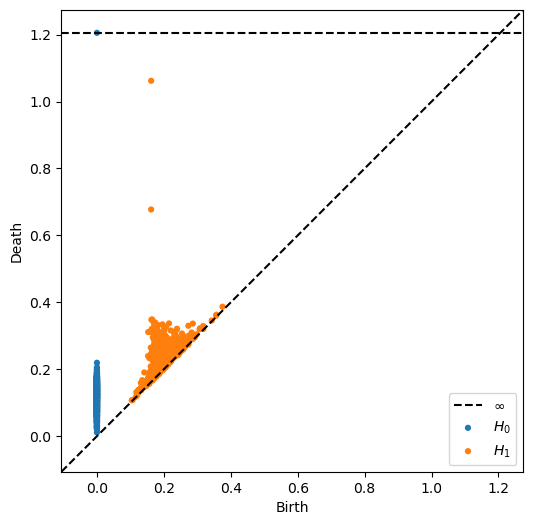

In [133]:
plot_dgms(output)

In [97]:
persistent_H1_intervals(output)

[0.8951757401227951,
 0.5097799152135849,
 0.18523670732975006,
 0.17224998772144318,
 0.17002195119857788,
 0.16540348529815674,
 0.16337637603282928,
 0.162375345826149,
 0.15923643112182617,
 0.15799154341220856,
 0.15276435017585754,
 0.1520170420408249,
 0.14935307204723358,
 0.1470099240541458,
 0.14499859511852264,
 0.14121496677398682,
 0.14068984985351562,
 0.1348501443862915,
 0.13429956138134003,
 0.13316203653812408,
 0.13244470953941345,
 0.1314825415611267,
 0.13137800991535187,
 0.13095344603061676,
 0.1309226006269455,
 0.13087108731269836,
 0.1300918012857437,
 0.12884244322776794,
 0.12870684266090393,
 0.1281401365995407,
 0.12381379306316376,
 0.12338967621326447,
 0.12270969152450562,
 0.1226247251033783,
 0.12226174771785736,
 0.12218070030212402,
 0.12192954123020172,
 0.1214979737997055,
 0.12083441019058228,
 0.12076462805271149,
 0.11929945647716522,
 0.11744394898414612,
 0.11624446511268616,
 0.11475937068462372,
 0.11452402174472809,
 0.11247074604034424,
 

In [100]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)

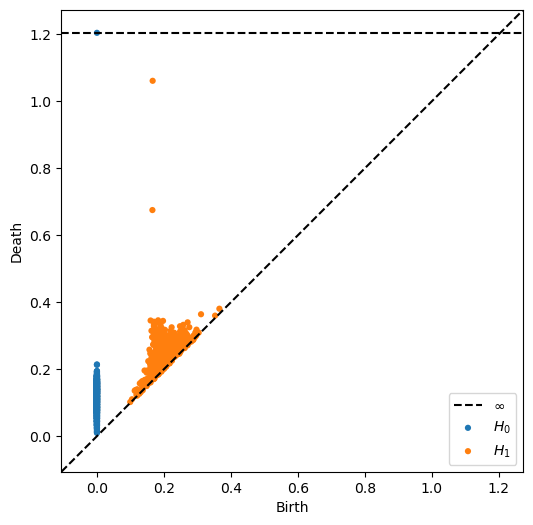

In [101]:
plot_dgms(output)

In [102]:
persistent_H1_intervals(output)

[0.8951757401227951,
 0.5097799152135849,
 0.18523670732975006,
 0.17224998772144318,
 0.17002195119857788,
 0.16540348529815674,
 0.16337637603282928,
 0.162375345826149,
 0.15923643112182617,
 0.15799154341220856,
 0.15276435017585754,
 0.1520170420408249,
 0.14935307204723358,
 0.1470099240541458,
 0.14499859511852264,
 0.14121496677398682,
 0.14068984985351562,
 0.1348501443862915,
 0.13429956138134003,
 0.13316203653812408,
 0.13244470953941345,
 0.1314825415611267,
 0.13137800991535187,
 0.13095344603061676,
 0.1309226006269455,
 0.13087108731269836,
 0.1300918012857437,
 0.12884244322776794,
 0.12870684266090393,
 0.1281401365995407,
 0.12381379306316376,
 0.12338967621326447,
 0.12270969152450562,
 0.1226247251033783,
 0.12226174771785736,
 0.12218070030212402,
 0.12192954123020172,
 0.1214979737997055,
 0.12083441019058228,
 0.12076462805271149,
 0.11929945647716522,
 0.11744394898414612,
 0.11624446511268616,
 0.11475937068462372,
 0.11452402174472809,
 0.11247074604034424,
 

In [184]:
def distance_C2(x, y, a, b): 
    X = [x]
    X.append([x[0]+a, x[1], x[2]])
    X.append([x[0], x[1]+b, x[2]])
    X.append([a-x[0], b-x[1], x[2]+pi])
    Y = [y]
    Y.append([y[0]+a, y[1], y[2]])
    Y.append([y[0], y[1]+b, y[2]])
    Y.append([a-y[0], b-y[1], y[2]+pi])
    distances = []
    for x in X:
        for y in Y:
            distances.append(dist(x,y))
    return min(distances)

In [205]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],2,2)

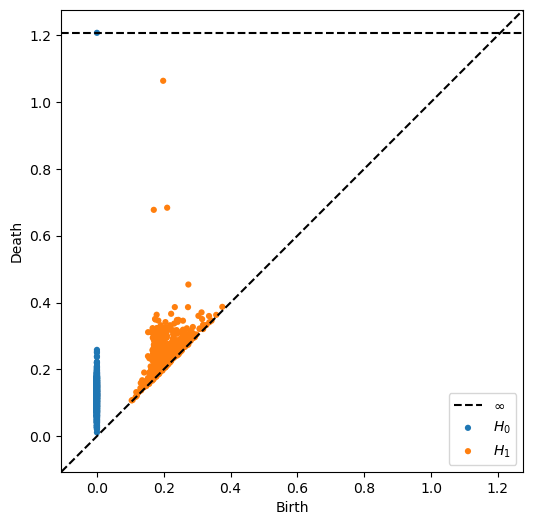

In [206]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

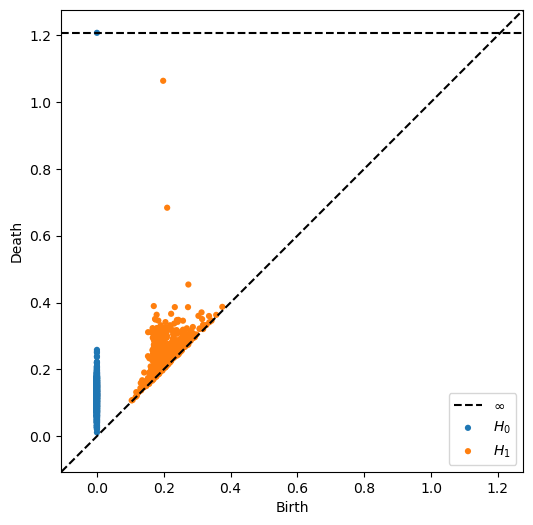

In [203]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [208]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],3,3)

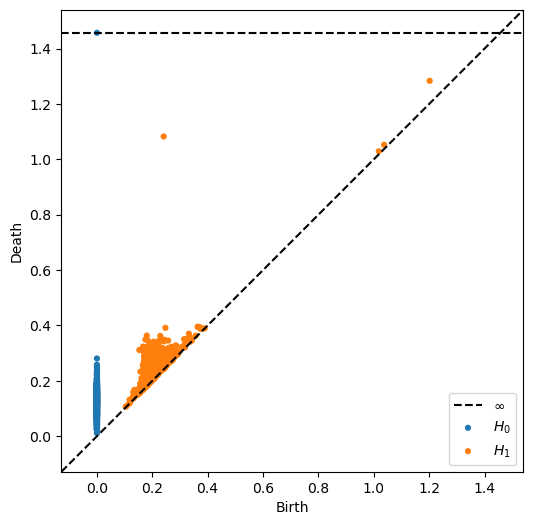

In [209]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

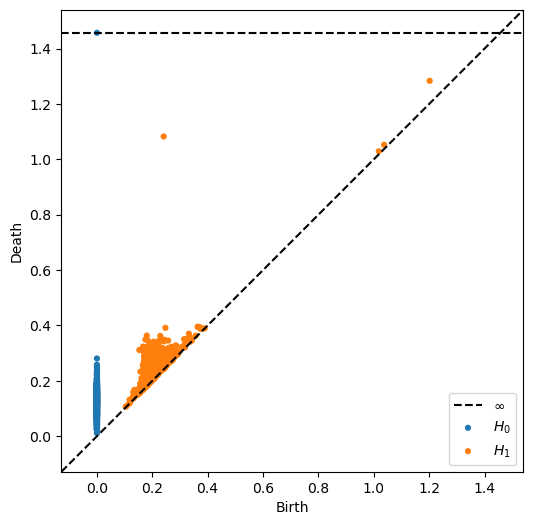

In [210]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

# C1

In [162]:
def top_bottomy(x,y,a,b):
    new_y = (y[0], y[1], y[2]+2*pi)
    return dist(x,new_y)

def top_bottomx(x,y,a,b):
    new_x = (x[0], x[1], x[2]+2*pi)
    return dist(new_x,y)

def right_lefty(x,y,a,b):
    new_y = (y[0]+a,y[1],y[2])
    return dist(x,new_y)

def right_leftx(x,y,a,b):
    new_x = (x[0]+a,x[1],x[2])
    return dist(new_x,y)

def front_backy(x,y,a,b):
    new_y = (y[0], y[1]+b, y[2])
    return dist(x,new_y)

def front_backx(x,y,a,b):
    new_x = (x[0], x[1]+b, x[2])
    return dist(new_x,y)

In [163]:
def distance_C1(x, y, a, b): # x = (x1,x2,x3), y = (y1,y2,y3)
    return min([euc(x,y), top_bottomx(x,y,a,b), right_leftx(x,y,a,b), front_backx(x,y,a,b), top_bottomy(x,y,a,b), right_lefty(x,y,a,b), front_backy(x,y,a,b)])

In [164]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],2,1)

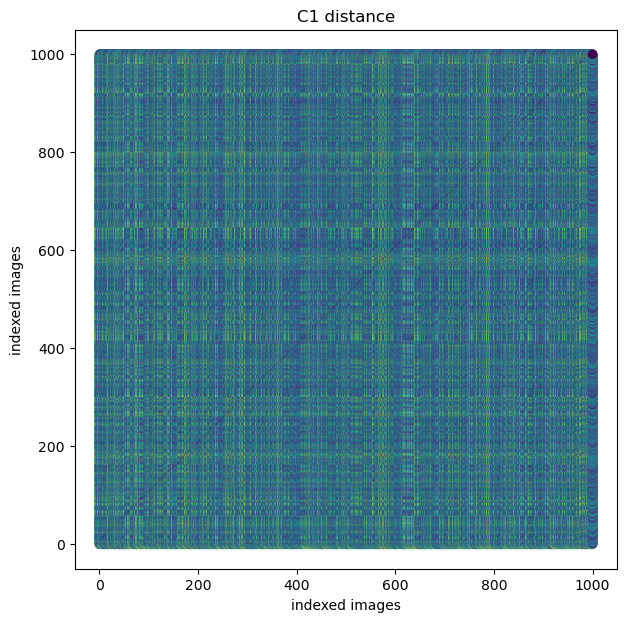

In [165]:
view_dist_matrix(matrix=M, num_pixels=1000, window_size=1000, title = 'C1 distance')

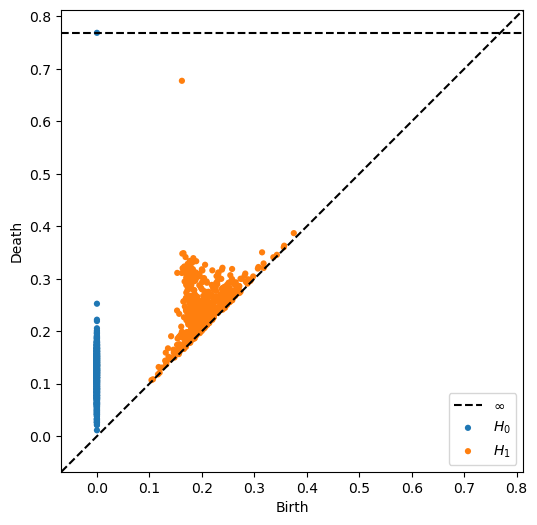

In [166]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

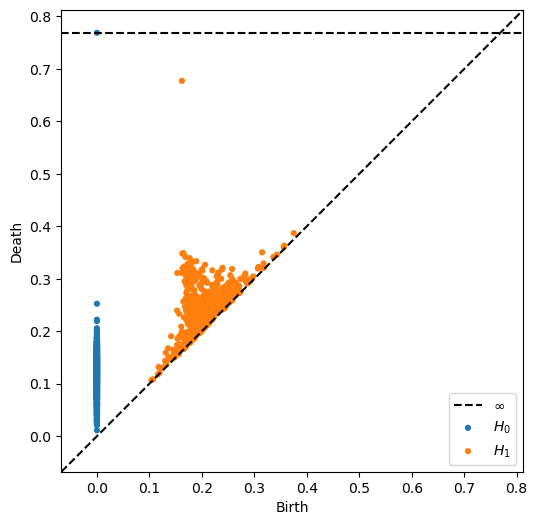

In [167]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [216]:
def distance_C1(x, y, a, b): 
    X = [x]
    X.append([x[0]+a, x[1], x[2]])
    X.append([x[0], x[1]+b, x[2]])
    X.append([x[0], x[1], x[2] + 2*pi])
    Y = [y]
    Y.append([y[0]+a, y[1], y[2]])
    Y.append([y[0], y[1]+b, y[2]])
    Y.append([y[0], y[1], y[2] + 2*pi])
    distances = []
    for x in X:
        for y in Y:
            distances.append(dist(x,y))
    return min(distances)

In [179]:
distance_C1((.5,.5,.5), (1.5,.75,3*pi/4),2,1)

[2.12319523017089,
 3.5366591559578398,
 2.451113621483186,
 8.20438928171173,
 2.12319523017089,
 2.12319523017089,
 2.451113621483186,
 8.20438928171173,
 2.2378467296534006,
 3.6066546806452675,
 2.12319523017089,
 8.234804398761778,
 4.5454095188100885,
 5.353573357458489,
 4.707520333858301,
 2.123195230170889]

In [217]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],2,1)

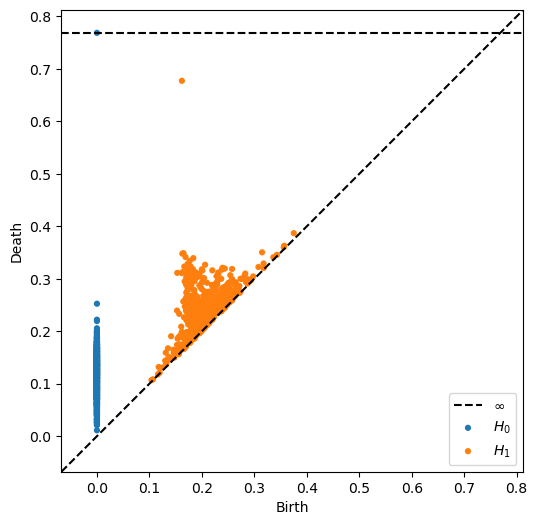

In [218]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

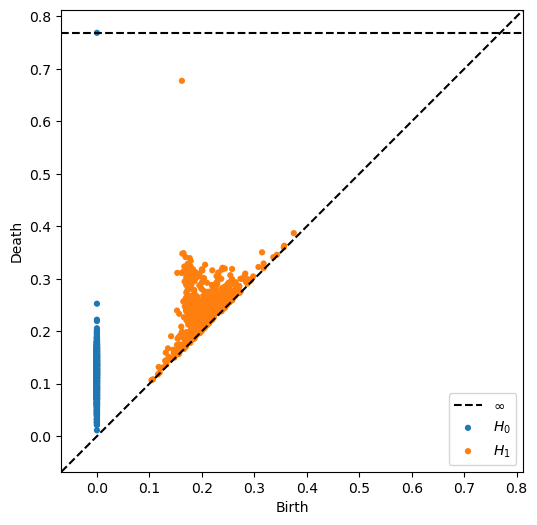

In [219]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [220]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],3,3)

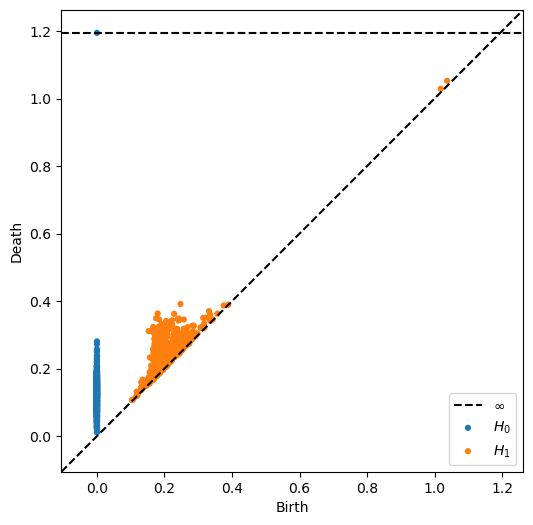

In [221]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

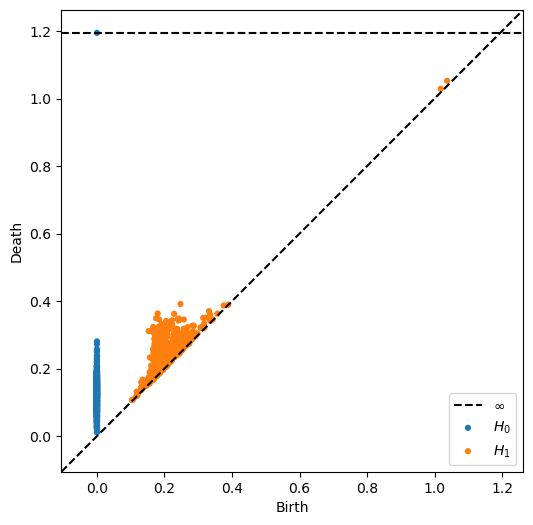

In [222]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [223]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],6,6)

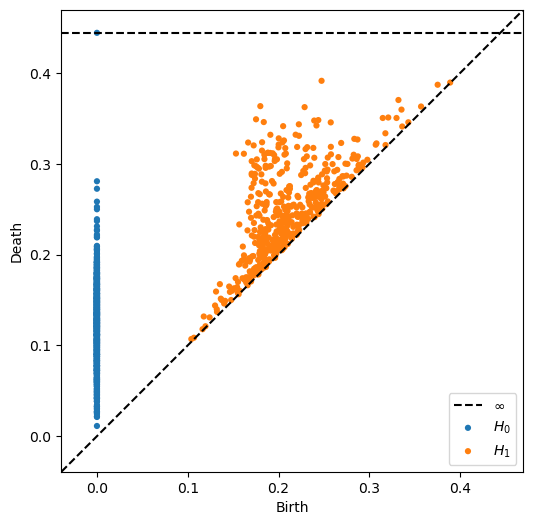

In [224]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

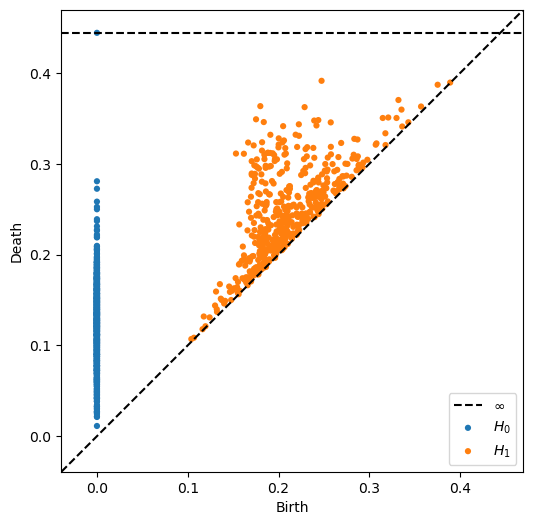

In [225]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [226]:
def distance_C1(x, y, a, b): 
    X = [x]
    X.append([x[0]+a, x[1], x[2]])
    X.append([x[0]+a, x[1]+b, x[2]])
    X.append([x[0], x[1]+b, x[2]])
    X.append([x[0], x[1]+b, x[2] + 2*pi])
    X.append([x[0], x[1], x[2] + 2*pi])
    X.append([x[0]+a, x[1], x[2] + 2*pi])
    Y = [y]
    Y.append([y[0]+a, y[1], y[2]])
    Y.append([y[0]+a, y[1]+b, y[2]])
    Y.append([y[0], y[1]+b, y[2]])
    Y.append([y[0], y[1]+b, y[2]+2*pi])
    Y.append([y[0], y[1], y[2] + 2*pi])
    Y.append([y[0]+a, y[1], y[2] + 2*pi])
    distances = []
    for x in X:
        for y in Y:
            distances.append(dist(x,y))
    return min(distances)

In [228]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],2,1)

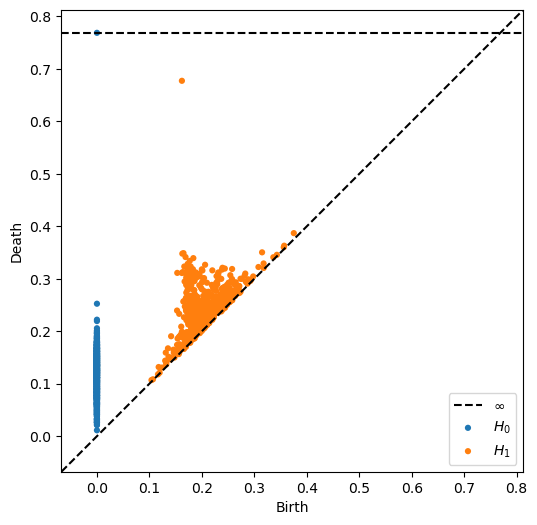

In [229]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

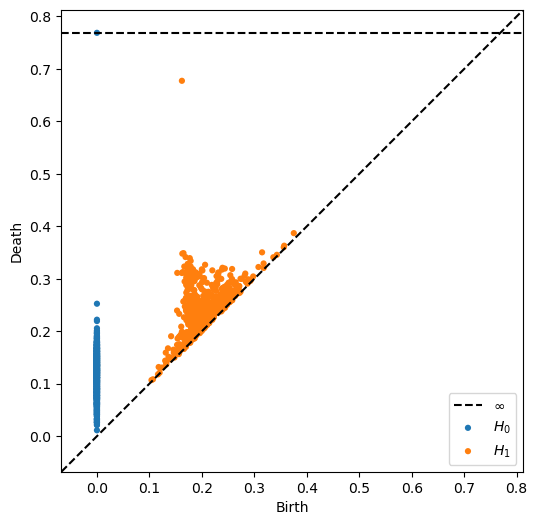

In [230]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [231]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],3,3)

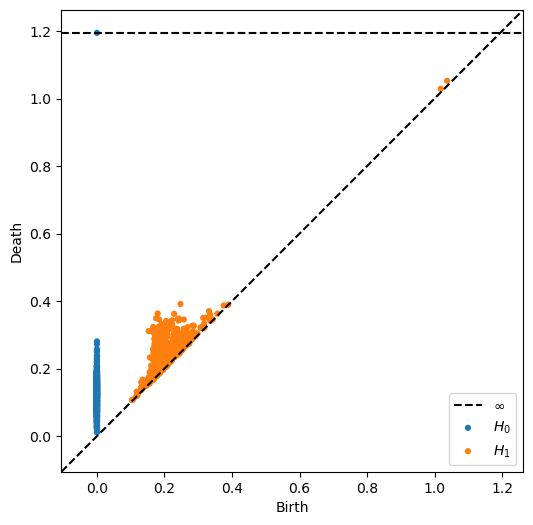

In [232]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

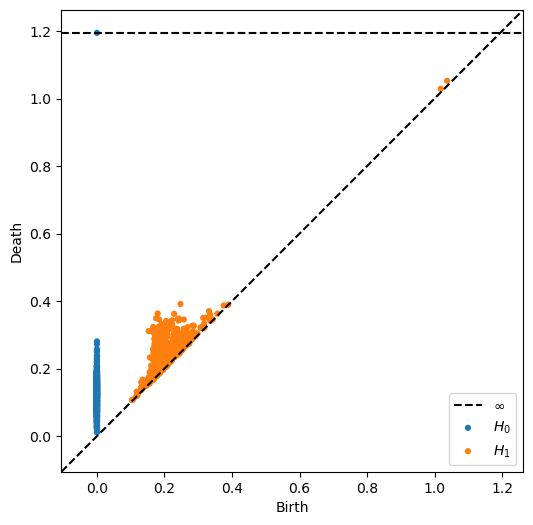

In [233]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [234]:
def distance_C1(x, y, a, b): 
    X = [x]
    Y = [y]
    Y.append([y[0]+a, y[1], y[2]])
    Y.append([y[0]-a, y[1], y[2]])
    Y.append([y[0], y[1]+b, y[2]])
    Y.append([y[0], y[1]-b, y[2]])
    Y.append([y[0], y[1], y[2] + 2*pi])
    Y.append([y[0], y[1], y[2] - 2*pi])
    distances = []
    for x in X:
        for y in Y:
            distances.append(dist(x,y))
    return min(distances)

In [246]:
def generate_c1_isoms(n_isos, x_translate, y_translate):
    a = list(x_translate * np.random.random(n_isos)) 
    b = list(y_translate * np.random.random(n_isos)) 
    theta = list(2*pi * np.random.random(n_isos)) 
    
    isoms = []
    for i in range(n_isos):
        isoms.append((a[i],b[i],theta[i]))
        
    return isoms

In [248]:
isoms = generate_c1_isoms(1000, 6, 6)

In [249]:
M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C1(isoms[i], isoms[j],6,6)

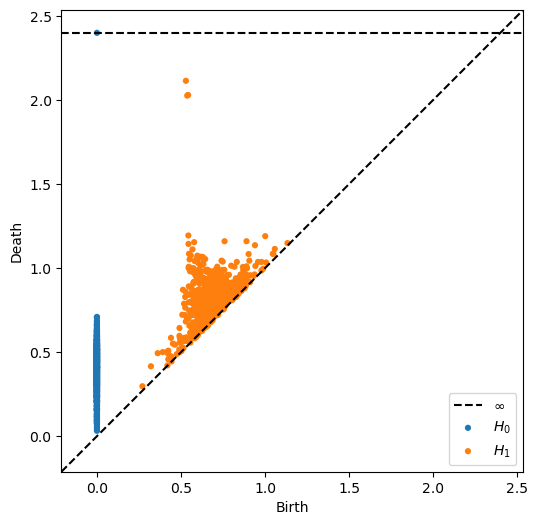

In [253]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [254]:
persistent_H1_intervals(output)

[1.5843902826309204,
 1.488471806049347,
 1.4869697093963623,
 0.649838924407959,
 0.5988312363624573,
 0.5755211114883423,
 0.5424310564994812,
 0.5368894934654236,
 0.5163317322731018,
 0.5004262328147888,
 0.47637009620666504,
 0.46329420804977417,
 0.46152639389038086,
 0.46035414934158325,
 0.45910418033599854,
 0.45419830083847046,
 0.4531395435333252,
 0.45047062635421753,
 0.44814032316207886,
 0.4454957842826843,
 0.4348961114883423,
 0.4299367666244507,
 0.42758774757385254,
 0.42742109298706055,
 0.42664891481399536,
 0.42200911045074463,
 0.41307342052459717,
 0.4097994565963745,
 0.4079497456550598,
 0.40033990144729614,
 0.39830678701400757,
 0.3926951289176941,
 0.3924110531806946,
 0.39214539527893066,
 0.3895173668861389,
 0.3859415650367737,
 0.38197827339172363,
 0.37976813316345215,
 0.3788028955459595,
 0.3735467195510864,
 0.3624715805053711,
 0.3613399267196655,
 0.3596746325492859,
 0.35910266637802124,
 0.3511222004890442,
 0.3462070822715759,
 0.34491908550262

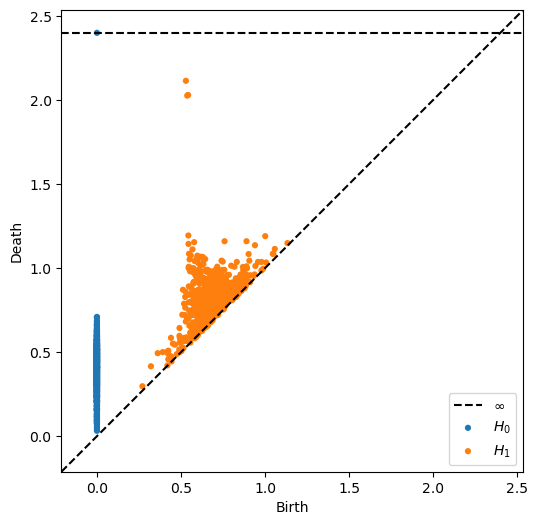

In [251]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

In [252]:
persistent_H1_intervals(output)

[1.5843902826309204,
 1.488471806049347,
 1.4869697093963623,
 0.649838924407959,
 0.5988312363624573,
 0.5755211114883423,
 0.5424310564994812,
 0.5368894934654236,
 0.5163317322731018,
 0.5004262328147888,
 0.47637009620666504,
 0.46329420804977417,
 0.46152639389038086,
 0.46035414934158325,
 0.45910418033599854,
 0.45419830083847046,
 0.4531395435333252,
 0.45047062635421753,
 0.44814032316207886,
 0.4454957842826843,
 0.4348961114883423,
 0.4299367666244507,
 0.42758774757385254,
 0.42742109298706055,
 0.42664891481399536,
 0.42200911045074463,
 0.41307342052459717,
 0.4097994565963745,
 0.4079497456550598,
 0.40033990144729614,
 0.39830678701400757,
 0.3926951289176941,
 0.3924110531806946,
 0.39214539527893066,
 0.3895173668861389,
 0.3859415650367737,
 0.38197827339172363,
 0.37976813316345215,
 0.3788028955459595,
 0.3735467195510864,
 0.3624715805053711,
 0.3613399267196655,
 0.3596746325492859,
 0.35910266637802124,
 0.3511222004890442,
 0.3462070822715759,
 0.34491908550262